<a href="https://colab.research.google.com/github/JoeyAviles89z/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/JoeyAvilesnew_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset
# make lists of categorical and numeric columns
categorical_cols = df.columns[df.dtypes=='object']
numerical_cols = df.columns[df.dtypes!='object']

In [0]:
# Whar are the categorical columns?
categorical_cols

Index([], dtype='object')

In [0]:
# how many do we have of each?
print(f'{len(categorical_cols)} categorical columns')
print(f'{len(numerical_cols)} numerical columns')

0 categorical columns
32 numerical columns


In [0]:
#Check for nan values
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [0]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
df_ct = df[['radius_mean', 'perimeter_mean', 'area_mean']]

In [0]:
df_ct.head()

,radius_mean,perimeter_mean,area_mean
0,17.99,122.80,1001.0
1,20.57,132.90,1326.0
2,19.69,130.00,1203.0
3,11.42,77.58,386.1
4,20.29,135.10,1297.0


In [0]:
from sklearn.cluster import KMeans

In [0]:
# Use radius_mean, perimeter_mean and area_mean as our features.
features = ['radius_mean', 'perimeter_mean', 'area_mean']

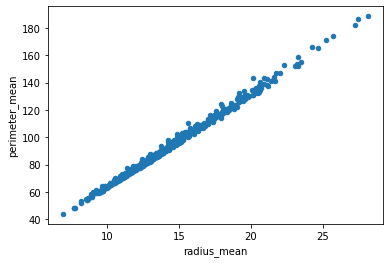

In [0]:
# plot them to see how they look.
df_ct[features].plot(kind="scatter", x=features[0], y=features[1]);

In [0]:
# Initialize an instance of the KMeans class from sklearn.
k = 5
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_ct[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign clusters back to our dataframe
df_ct['cluster'] = model.labels_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Get our centroids
centroids = model.cluster_centers_

In [0]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1,2
0,14.322611,93.197643,634.714013
1,20.193729,133.761017,1268.728814
2,11.373391,73.083579,401.728782
3,24.912500,167.216667,1934.166667
4,17.388714,114.202857,943.547143


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b', 'k', 'o']
colors =  [base_colors[centroid] for centroid in model.labels_]

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df_ct[features[0]], df_ct[features[1]], df_ct[features[2]] c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

SyntaxError: ignored

KeyError: ignored

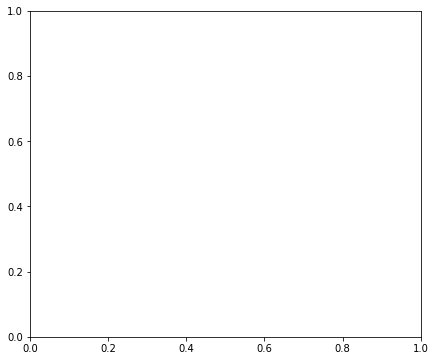

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df_ct[0], df_ct[1], df_ct[2], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=200);

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
# make lists of categorical and numeric columns
categorical_cols = df.columns[df.dtypes=='object']
numerical_cols = df.columns[df.dtypes!='object']

In [0]:
# Whar are the cat columns?
categorical_cols

Index(['diagnosis'], dtype='object')

In [0]:
# how many do we have of each?
print(f'{len(categorical_cols)} categorical columns')
print(f'{len(numerical_cols)} numerical columns')

1 categorical columns
32 numerical columns


In [0]:
# Cast all the categorical columns to "category" data type
df[categorical_cols] = df[categorical_cols].astype('category')

In [0]:
# Remove apostrophes from all of the categorical columns
for col in categorical_cols:
    df[col] = df[col].cat.codes #category codes

In [0]:
# How many numeric columns do we now have?
num_cols = df.columns[df.dtypes!='object']
print(df.shape)
len(num_cols)

(569, 33)


33

In [0]:
df = df.drop(['Unnamed: 32'], axis=1)

In [0]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Now everything is numeric and we can now use PCA.**

In [0]:
# Make a copy of our dataframe, we will standarize the copy so as to not overwrite our original data
df_processed = df.copy()

In [0]:
# instantiate the SKLearn class for standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
# Standardize the dataset (default is normalization)
df_processed = scaler.fit_transform(df_processed)

In [0]:
# import and instantiate the PCA class
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [0]:
# Apply PCA to the data
pca_features = pca.fit_transform(df_processed)

In [0]:
pca_features.shape

(569, 3)

In [0]:
df_processed.shape

(569, 32)

In [0]:
pca_features[:5]

array([[ 9.21672415,  2.13674957, -0.99666588],
       [ 2.65124379, -3.77074095, -0.55431877],
       [ 5.90069721, -1.01091626, -0.46784117],
       [ 7.13737623, 10.31563611, -3.25682764],
       [ 4.13926312, -1.91689091,  1.46527959]])

In [0]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.43512603, 0.17910333, 0.08952887])

In [0]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.7037582300210359

In [0]:
# How much information did we lose?
1-sum(pca.explained_variance_ratio_)

0.2962417699789641

In [0]:
# Turn that into a dataframe.
df_pca=pd.DataFrame(pca_features, columns=['comp_1', 'comp_2', 'comp_3'])
df_pca.head()

,comp_1,comp_2,comp_3
0,9.216724,2.136750,-0.996666
1,2.651244,-3.770741,-0.554319
2,5.900697,-1.010916,-0.467841
3,7.137376,10.315636,-3.256828
4,4.139263,-1.916891,1.465280


In [0]:
#now clustering
# Initialize an instance of the KMeans class from sklearn.
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
# Assign predicted clusters back to our dataframe
df_pca['cluster'] = model.labels_

In [0]:
# Get our centroids
centroids =  model.cluster_centers_

In [0]:
# turn them into a dataframe
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1,2
0,4.805289,6.016335,-1.386160
1,-1.849703,0.126459,0.063678
2,5.273652,-1.287872,-0.003135


In [0]:
# Setup some colors for plotting
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


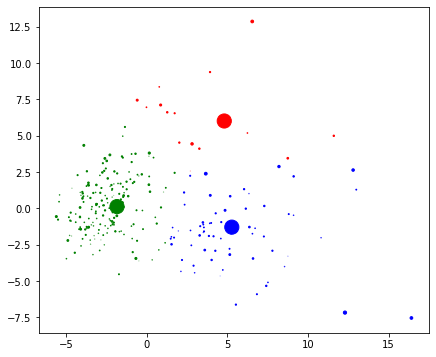

In [0]:
# Plot the scatter of our points with calculated centroids
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'], df_pca['comp_3'], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=200);

In [0]:
#make a spree plot
# define the number of components
num_components=len(pca.explained_variance_ratio_)
num_components

3

In [0]:
# create a numpy array as long as the number of components
ind = np.arange(num_components) 
ind

array([0, 1, 2])

In [0]:
# create an array of 3 values
vals = pca.explained_variance_ratio_
vals

array([0.43512603, 0.17910333, 0.08952887])

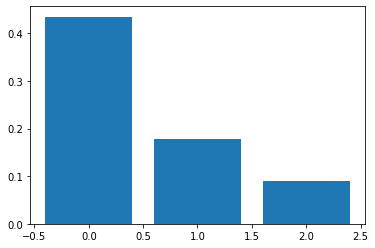

In [0]:
# Plot the variance explained by each component.
ind = np.arange(num_components)
num_components=len(pca.explained_variance_ratio_)
plt.bar(ind, vals);

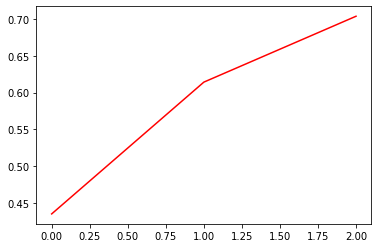

In [0]:
# Plot the cumulative variance explained by all the components.
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
# Define scree plot function
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

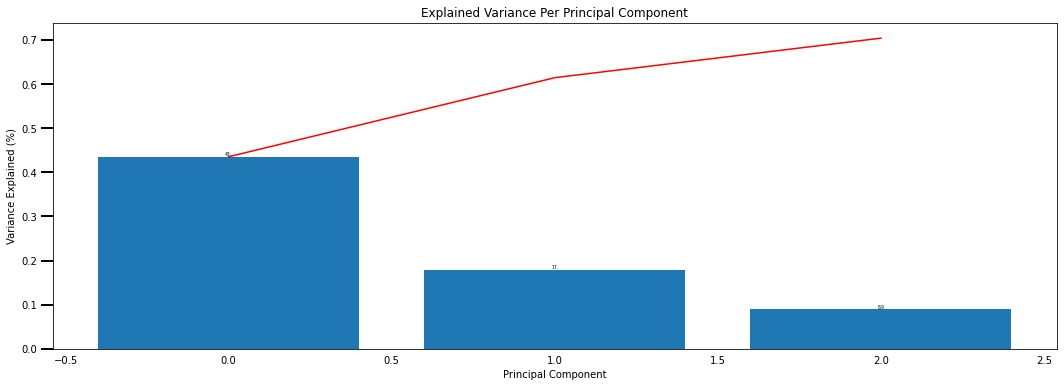

In [0]:
# Apply the plot function to our principle component
scree_plot(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project